# Simulation for Library Acquisitions - printed books version.

In [1]:
import random
import numpy as np
import pandas as pd
import math

In [2]:
# Before getting total costs of books, to get labor costs for maintenance and cataloging.
# Accroding to ***, hourly labor cost can be calculated by annual wages, befefit rate, and paid bvacation hours.

def labor_costs(annual_work_hour):
    annual_wages = random.randint(50000, 70000)
    benefit_rate = random.uniform(0, 0.3)
    paid_off_hour = random.randint(0, 42)
    average_cost = (annual_wages + (annual_wages * benefit_rate)) / (annual_work_hour - paid_off_hour)
    return round(average_cost, 2)
labor_costs(1950)

31.6

In [3]:
## maintenance_cost can calculate from total_volume. 
def maintenance_cost(annual_work_hour, total_volume):
    maintenance_labor = labor_costs(annual_work_hour) * 0.04
    volumes_per_box = math.ceil(total_volume / 25)
    maintenance_cost = volumes_per_box * maintenance_labor
    return round(maintenance_cost, 2)
maintenance_cost(1950, 350000)

18496.8

In [4]:
# cataloging cost per book. Since we do not know how many book a library buy, we calculate cataloging labor cost per book. 
def cataloging_cost(annual_work_hour):
    day_cataloging = random.randint(8, 12)
    daily_labor = labor_costs(annual_work_hour) * 8
    cost_per_book = daily_labor / day_cataloging
    return round(cost_per_book, 2)
cataloging_cost(1950)

19.78

In [5]:
# get list of books including book price and thickness.
def get_book_list(num_of_titles, annual_work_hour):
    cost_per_book = cataloging_cost(annual_work_hour)
    pages = np.random.randint(10, 2000, size=num_of_titles)
    page_thickness = np.random.uniform(0.01, 0.05, size=num_of_titles)
    thickness = np.around(page_thickness * pages, decimals=2)
    page_price = np.random.uniform(0.01, 0.1, size=num_of_titles)
    price = np.around(page_price * pages, decimals=2)
    # Three types of demand indicates 3 is high, 2 medium, and 1 low.
    demand_list = ['1', '2', '3']
    demands = []
    for i in range(num_of_titles):
        demand = random.choice(demand_list)
        demands.append(demand)

    df = pd.DataFrame(data={'Thickness': thickness,
                            'Price': price,
                            'Demands': demands,
                            'cataloging_cost': cost_per_book})
    return df
plan = get_book_list(10000, 1950)
plan

,Thickness,Price,Demands,cataloging_cost
0,71.41,109.49,1,25.63
1,16.91,53.75,1,25.63
2,51.90,47.66,2,25.63
3,6.83,7.02,3,25.63
4,32.94,36.74,3,25.63
5,85.87,114.07,3,25.63
6,29.76,74.43,2,25.63
7,3.39,9.63,3,25.63
8,26.94,19.84,3,25.63
9,64.41,157.02,3,25.63


In [6]:
# vendor discount. We assume that vendor discount if a library purchase large volumes from them.
def vendor_discount(num_of_titles):
    if num_of_titles < 100:
        return 0.01
    elif 100 <= num_of_titles < 500:
        return 0.02
    elif num_of_titles >= 500:
        return 0.05

In [7]:
# Now we select from the list we created above.
# We consider both budget and thickness.
# We aggregate price and thickness separately, and we drop all nan value. 
# This is examples how it works.
plan = get_book_list(100, 1950)
budget = 1000 
space = 400
select_plan = plan.copy(deep=True)
select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging_cost']
print('This is total cost per book include book price itself and cataloging cost.\n\n', select_plan, '\n')
select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= budget)
print('Check price\n\n', select_plan)
select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
print('Check thickness\n\n', select_plan)
acquisitions = select_plan.dropna()
acquisitions

This is total cost per book include book price itself and cataloging cost.

     Thickness   Price Demands  cataloging_cost  total_cost_per_book
0       45.62   54.88       2            28.37                83.25
1       16.77   36.07       2            28.37                64.44
2       76.62   27.01       2            28.37                55.38
3       34.99   14.26       3            28.37                42.63
4       18.27  133.15       2            28.37               161.52
5       30.59   34.84       1            28.37                63.21
6       69.58  164.13       2            28.37               192.50
7       10.36   17.20       3            28.37                45.57
8       17.66   47.94       1            28.37                76.31
9       44.93   78.18       2            28.37               106.55
10      67.58   86.73       2            28.37               115.10
11      52.87  139.89       1            28.37               168.26
12       6.97   14.06       1          

,Thickness,Price,Demands,cataloging_cost,total_cost_per_book,cost_accumulate,Total_thickness
0,45.62,54.88,2,28.37,83.25,83.25,45.62
1,16.77,36.07,2,28.37,64.44,147.69,62.39
2,76.62,27.01,2,28.37,55.38,203.07,139.01
3,34.99,14.26,3,28.37,42.63,245.70,174.00
4,18.27,133.15,2,28.37,161.52,407.22,192.27
5,30.59,34.84,1,28.37,63.21,470.43,222.86
6,69.58,164.13,2,28.37,192.50,662.93,292.44
7,10.36,17.20,3,28.37,45.57,708.50,302.80
8,17.66,47.94,1,28.37,76.31,784.81,320.46
9,44.93,78.18,2,28.37,106.55,891.36,365.39


In [8]:
# From the above test, the code is re-written as a function. 
# return a dataFrame which is satisfied with both conditions (budget and thickness)

def select_book(plan, budget, space):
    select_plan = plan.copy(deep=True)
    select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging_cost']
    select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= budget)
    select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
    acquisitions = select_plan.dropna()
    return acquisitions

select_book(plan, 1000000, 1000)

,Thickness,Price,Demands,cataloging_cost,total_cost_per_book,cost_accumulate,Total_thickness
0,45.62,54.88,2,28.37,83.25,83.25,45.62
1,16.77,36.07,2,28.37,64.44,147.69,62.39
2,76.62,27.01,2,28.37,55.38,203.07,139.01
3,34.99,14.26,3,28.37,42.63,245.70,174.00
4,18.27,133.15,2,28.37,161.52,407.22,192.27
5,30.59,34.84,1,28.37,63.21,470.43,222.86
6,69.58,164.13,2,28.37,192.50,662.93,292.44
7,10.36,17.20,3,28.37,45.57,708.50,302.80
8,17.66,47.94,1,28.37,76.31,784.81,320.46
9,44.93,78.18,2,28.37,106.55,891.36,365.39


In [9]:
# The simulation has two strateges.
# One is buying books based on users' demands.
# Second is buying books 
def MonteCarloSimulation(annual_work_hour, total_volume, budget, space, num_of_titles):
    acquisition_budget = budget - maintenance_cost(annual_work_hour, total_volume)


    plan = get_book_list(num_of_titles, annual_work_hour)


    demand_order = plan.sort_values(by='Demands', ascending=False)
    price_order = plan.sort_values(by='Price', ascending=True)

    demand_acquisition = select_book(demand_order, acquisition_budget, space)
    price_acquisition = select_book(price_order, acquisition_budget, space)

    demand_book = demand_acquisition['Price'].count()
    demand_cost = round(demand_acquisition['total_cost_per_book'].sum() * (1 - vendor_discount(demand_book)), 2)
    demand_thickness = math.ceil(demand_acquisition['Thickness'].sum())

    price_book = price_acquisition['Price'].count()
    price_cost = round(price_acquisition['total_cost_per_book'].sum() * 1 - vendor_discount(price_book), 2)
    price_thickness = math.ceil(price_acquisition['Thickness'].sum())

    sim_data = [demand_book, demand_cost, demand_thickness, price_book, price_cost, price_thickness]

    return sim_data
MonteCarloSimulation(1950, 50000, 1000000000, 10000, 100000)

[338, 26032.39, 9987, 4307, 114380.09, 9999]

In [10]:
# Simulation for 100 times and return Data Frame.
if __name__ == '__main__':


    datas = []
    for i in range(100):
        data = MonteCarloSimulation(1950, 50000, 1000000000, 10000, 100000)
        datas.append(data)
    simulation_result = pd.DataFrame(datas, columns=['num_of_books_by_demand',
                                                     'total_cost_by_demand',
                                                     'total_thickness_by_demand',
                                                     'num_of_books_by_price',
                                                     'total_cost_by_price',
                                                     'total_thickness_by_price'])
simulation_result

,num_of_books_by_demand,total_cost_by_demand,total_thickness_by_demand,num_of_books_by_price,total_cost_by_price,total_thickness_by_price
0,338,29781.89,9966,4169,150307.31,9994
1,331,29311.48,9958,4200,154458.64,10000
2,320,23211.95,9982,4258,100817.96,9998
3,340,26812.70,9966,4294,118827.68,10000
4,328,26920.38,9995,4247,120686.79,9998
5,307,29719.02,9995,4239,177799.43,9996
6,340,27931.71,9994,4308,129316.50,10000
7,365,32330.82,9994,4242,174247.67,9998
8,319,24060.04,9974,4176,123689.87,9992
9,320,25997.35,9959,4191,116124.80,9997


In [11]:
import matplotlib.pyplot as plt


a = simulation_result['total_cost_by_demand']
b = simulation_result['num_of_books_by_demand']
c = simulation_result['total_cost_by_price']
d = simulation_result['num_of_books_by_price']
e = simulation_result['total_thickness_by_demand']
f = simulation_result['total_thickness_by_price']

s = np.random.rand(*a.shape) * 1000 + 800

plt.title("Possible Number of Books and Total Costs by User Demand")
plt.scatter(a, b, s, c="g", alpha=0.5, marker=r'.',
            label="")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.show()

<Figure size 640x480 with 1 Axes>

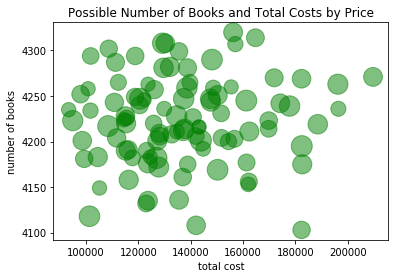

In [12]:
s = np.random.rand(*a.shape) * 1000 + 800

plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(c, d, s, c="g", alpha=0.5, marker=r'.',
            label="")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.show()

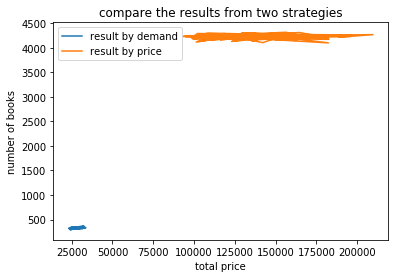

In [13]:
plt.plot(a, b, label='result by demand')
plt.plot(c, d, label='result by price')
plt.xlabel('total price')
plt.ylabel('number of books')

plt.title('compare the results from two strategies')

plt.legend()

plt.show()

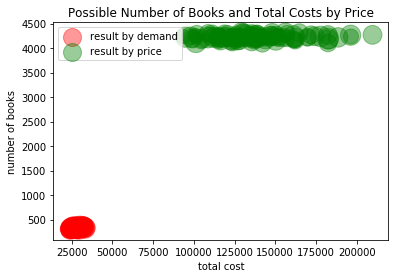

In [14]:
plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(a, b, s, c="r", alpha=0.4, marker = '.',
            label="result by demand")
plt.scatter(c, d, s, c="g", alpha=0.4, marker = '.',
            label="result by price")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.legend()

plt.show()

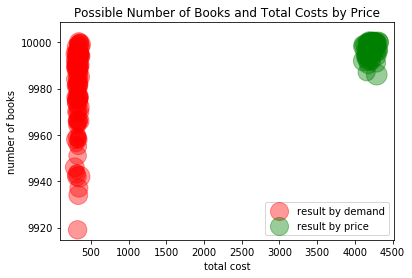

In [15]:
plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(b, e, s, c="r", alpha=0.4, marker = '.',
            label="result by demand")
plt.scatter(d, f, s, c="g", alpha=0.4, marker = '.',
            label="result by price")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.legend()

plt.show()